In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [58]:
# Load the dataset (replace with your file path)
df = pd.read_csv(r'D:\CognoRise\marketing_campaign.csv')

In [60]:
# Take a peek at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [62]:
# Take a peek at the data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning & Preprocessing

In [64]:
# Check for missing values
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [66]:
# Check data types
print(df.dtypes)

# Handle missing or zero values in income column
df.fillna({'Income': df['Income'].mean()}, inplace=True)


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [68]:
# Statistical summary
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Visualizing Data Distributions

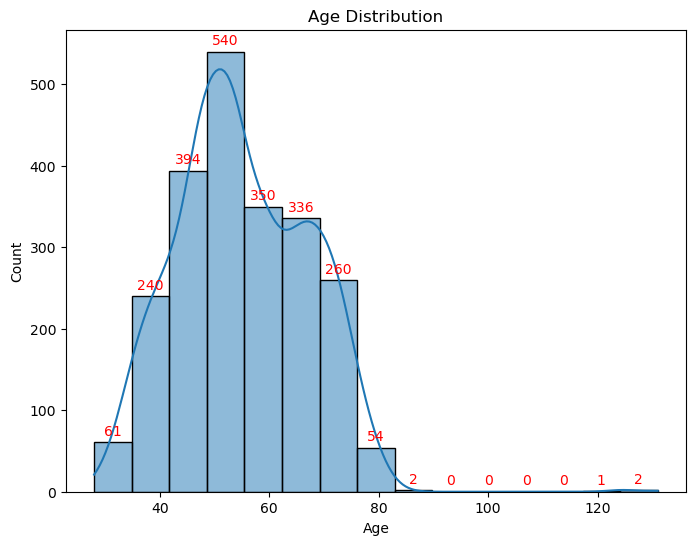

In [78]:
# Calculate the current year and create an 'Age' column
current_year = 2024  # Replace this with the current year
df['Age'] = current_year - df['Year_Birth']

# Plot the distribution of Age with data labels
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Age'], bins=15, kde=True)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

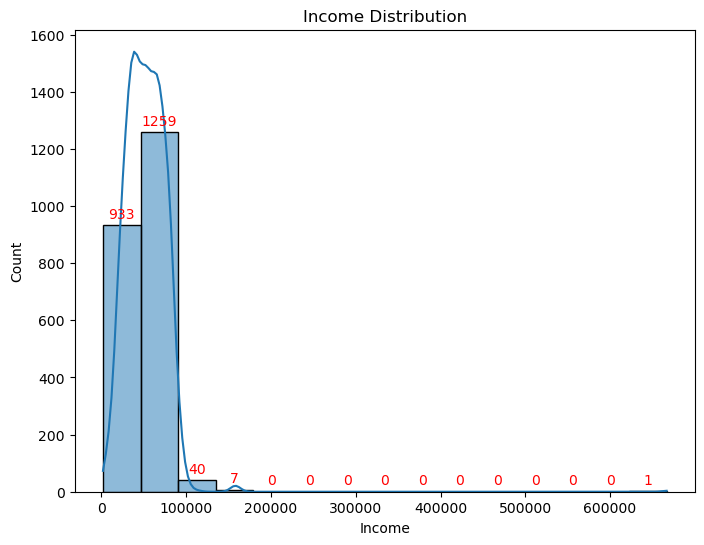

In [80]:
# Distribution of Income
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['Income'], bins=15, kde=True)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')
    
# Set the title and labels
plt.title('Income Distribution')
plt.xlabel('Income')
plt.show()

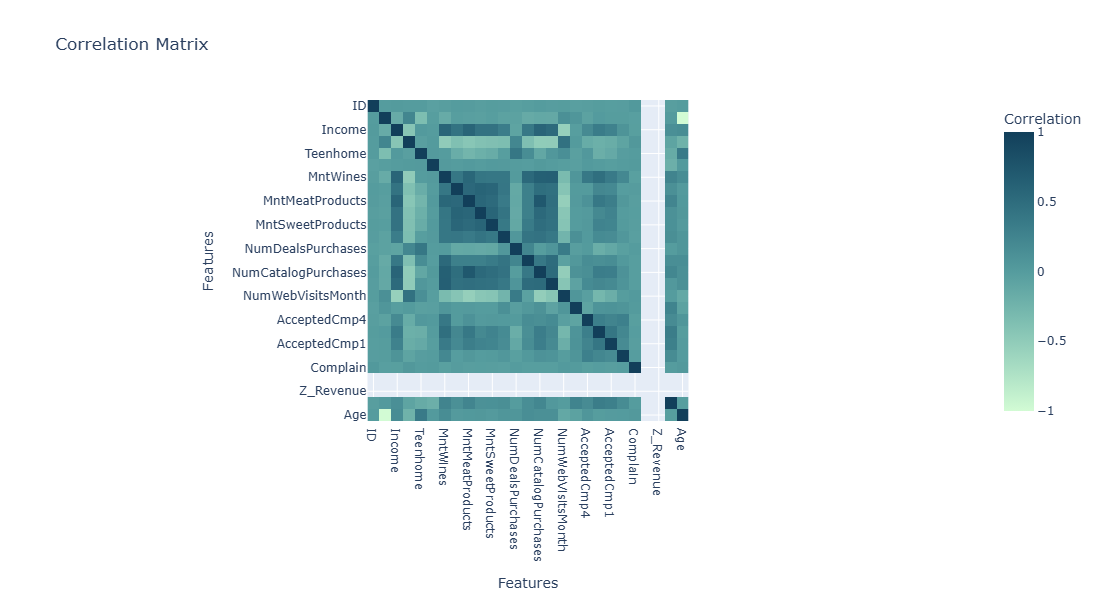

In [99]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix from numeric columns
correlation_matrix = df_numeric.corr()

# Create an interactive heatmap using Plotly
fig = px.imshow(correlation_matrix, 
                color_continuous_scale='darkmint',
                title='Correlation Matrix',
                labels=dict(x='Features', y='Features', color='Correlation'),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns)

# Show the figure
fig.update_layout(width=800, height=600)
fig.show()

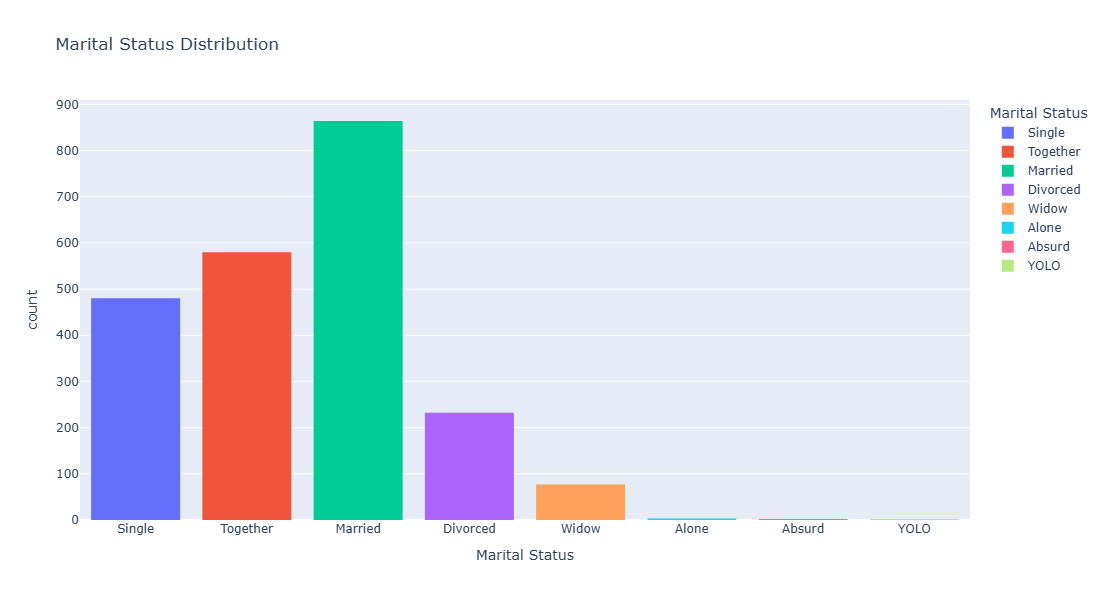

In [101]:
# Create an interactive count plot for Marital Status
fig = px.histogram(df, 
                   x='Marital_Status', 
                   title='Marital Status Distribution', 
                   labels={'Marital_Status': 'Marital Status'},
                   color='Marital_Status',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the figure
fig.update_layout(width=800, height=600)
fig.show()

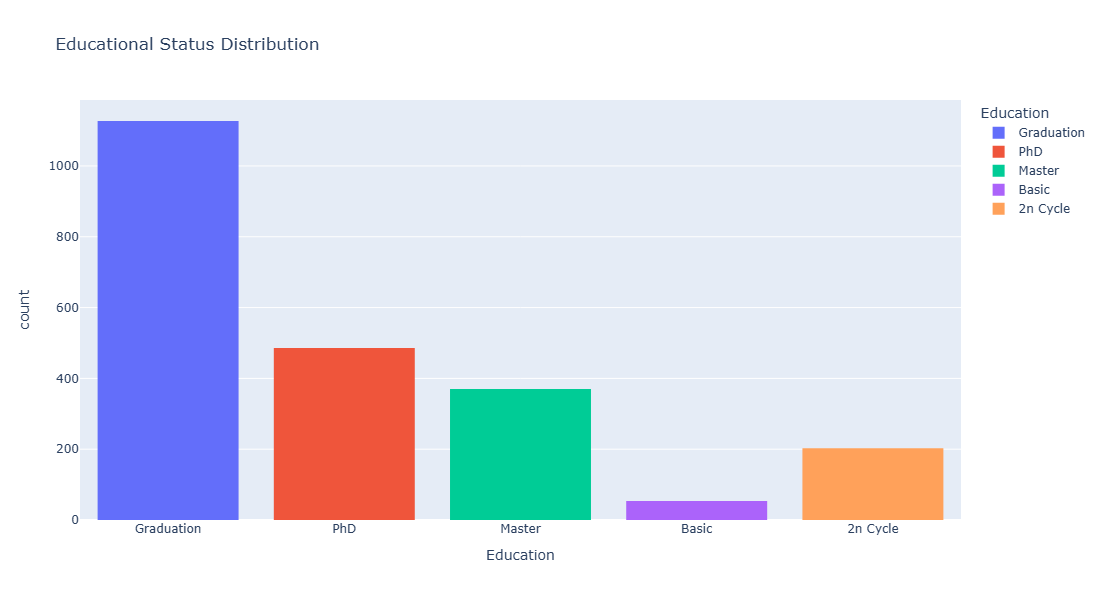

In [105]:
# Create an interactive count plot for Marital Status
fig = px.histogram(df, 
                   x='Education', 
                   title='Educational Status Distribution', 
                   labels={'Education': 'Education'},
                   color='Education',
                   color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the figure
fig.update_layout(width=800, height=600)
fig.show()

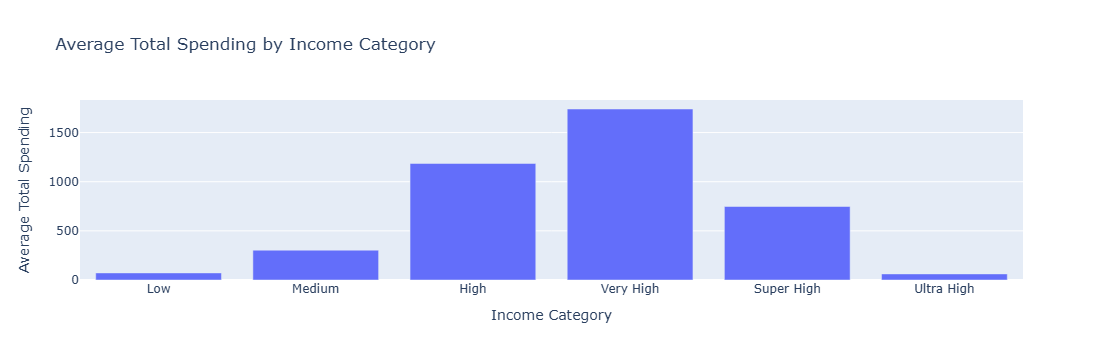

In [123]:
# Calculate Total Spending as the sum of relevant spending columns
df['Total_Spending'] = (
    df['MntWines'] + 
    df['MntFruits'] + 
    df['MntMeatProducts'] + 
    df['MntFishProducts'] + 
    df['MntSweetProducts'] + 
    df['MntGoldProds']
)

# Create income categories
df['Income_Category'] = pd.cut(df['Income'], bins=[0, 30000, 60000, 90000, 120000, 600000, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High', 'Super High','Ultra High'])

# Calculate average Total Spending per Income Category
avg_spending = df.groupby('Income_Category', observed=False)['Total_Spending'].mean().reset_index()

# Create a bar plot
fig = px.bar(avg_spending, x='Income_Category', y='Total_Spending',
             title='Average Total Spending by Income Category',
             labels={'Income_Category': 'Income Category', 'Total_Spending': 'Average Total Spending'})
fig.show()

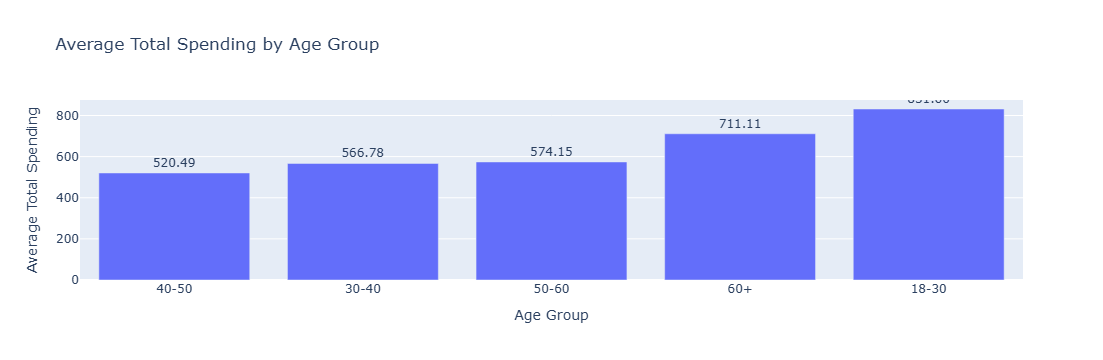

In [133]:
# Creating Age Groups
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '30-40', '40-50', '50-60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Create Total Spending Categories
df['Food'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']
df['Other'] = df['MntGoldProds'] 


# Calculate Total Spending
df['Total_Spending'] = df['Food'] + df['Other']

# Group by Age Group and calculate average Total Spending
avg_spending_age_group = df.groupby('Age_Group',observed=False)['Total_Spending'].mean().reset_index()

# Create a bar plot using Plotly
fig = px.bar(avg_spending_age_group, x='Age_Group', y='Total_Spending',
             title='Average Total Spending by Age Group',
             labels={'Age_Group': 'Age Group', 'Total_Spending': 'Average Total Spending'},
             text='Total_Spending')

# Customize the bar plot for better visuals
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_title='Average Total Spending',
                  xaxis_title='Age Group',
                  barmode='group',
                  xaxis=dict(title='Age Group', categoryorder='total ascending'))

# Show the plot
fig.show()

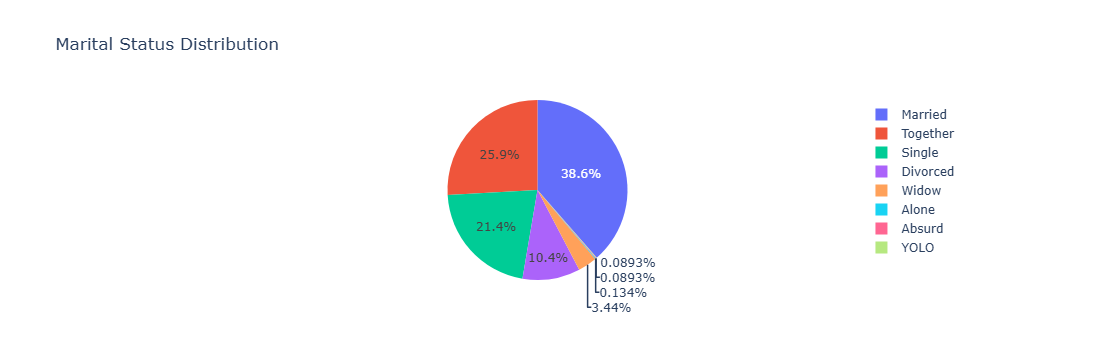

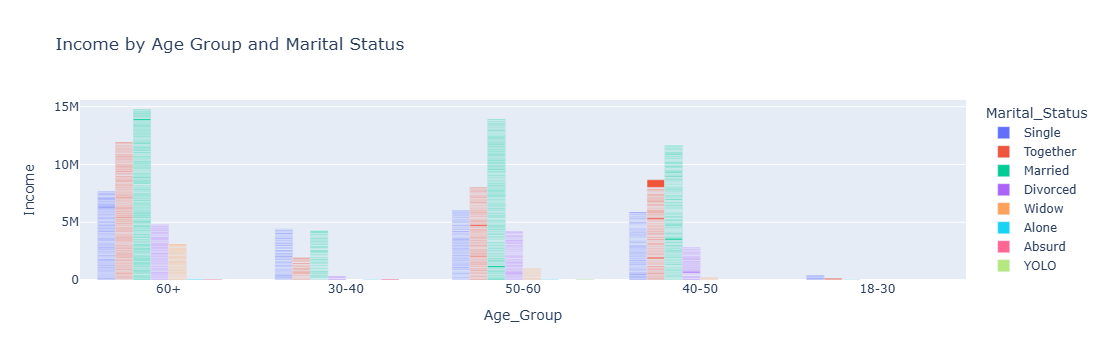

In [135]:
# Plotly Pie Chart for Marital Status
fig = px.pie(df, names='Marital_Status', title='Marital Status Distribution')
fig.show()

# Plotly Bar Plot for Income by Age Group
fig = px.bar(df, x='Age_Group', y='Income', color='Marital_Status', barmode='group', title='Income by Age Group and Marital Status')
fig.show()